In [29]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats

import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
yt = np.array([5])
nt = np.array([15])
with pm.Model() as model0:
    p_t = pm.Beta('pt', alpha=1, beta=1)
    l_t = pm.Binomial('lt', p=p_t, observed=yt, n=nt)
    
    trace0 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.8874259634191565, but should be close to 0.8. Try to increase the number of tuning steps.


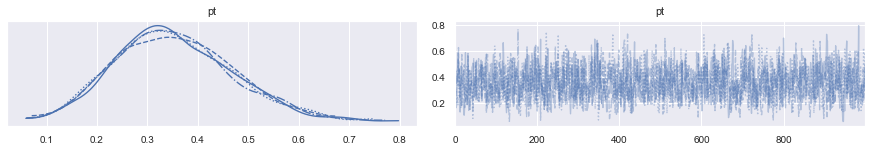

In [22]:
with model0:
    pm.traceplot(trace0)

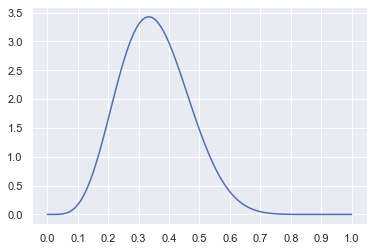

In [27]:
x = np.linspace(0,1,100)
p = stats.beta(a=1+5,b=1+15-5).pdf(x)
plt.plot(x,p);
plt.xticks(ticks=np.linspace(0,1,11));

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pc, pt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


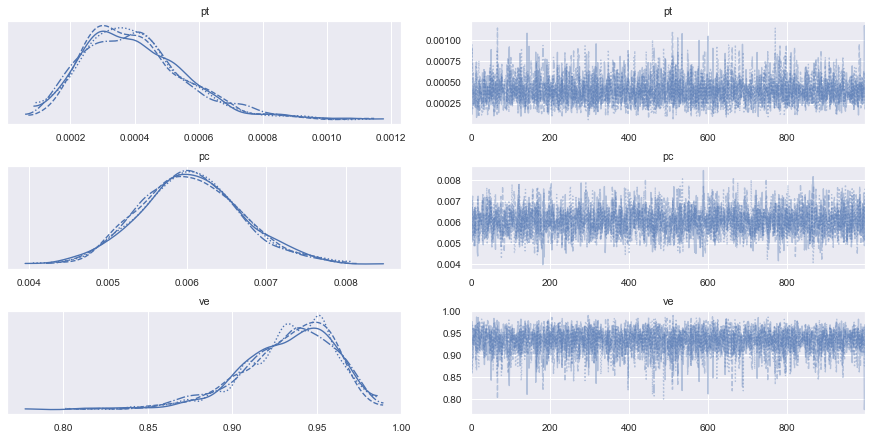

In [28]:
yt = np.array([500])
nt = 1500000
yc = 9000
nc = 1500000
with pm.Model() as model:
    p_t = pm.Beta('pt', alpha=1, beta=1)
    l_t = pm.Binomial('lt', p=p_t, observed=yt, n=nt)
    p_c = pm.Beta('pc', alpha=1, beta=1)
    l_c = pm.Binomial('lc', p=p_c, observed=yc, n=nc)
    
    ve = pm.Deterministic('ve', 1. - p_t / p_c)
    trace = pm.sample()

with model:
    pm.traceplot(trace)

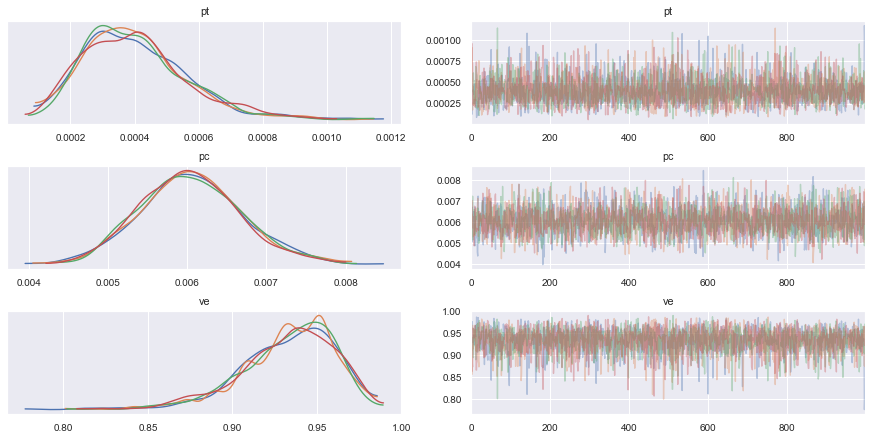

In [34]:
with model:
    az.plot_trace(trace)

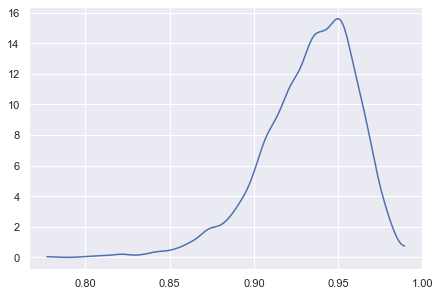

In [37]:
az.plot_dist(trace['ve']);

In [41]:
az.hdi(trace['ve'])

array([0.88168539, 0.97984999])

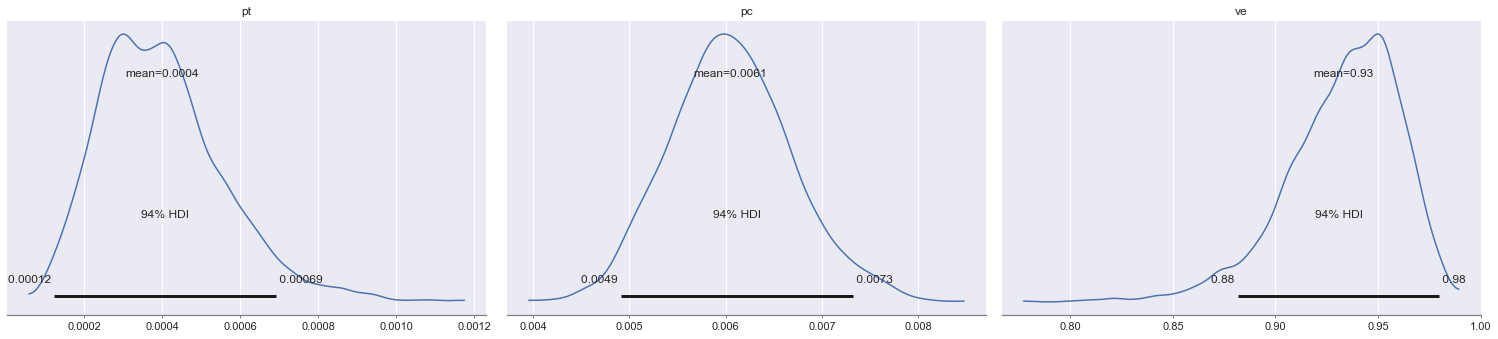

In [43]:
with model:
    az.plot_posterior(trace);

In [45]:
yt = np.array([500])
nt = 1500000
yc = 9000
nc = 1500000
with pm.Model() as model:
    p_t = pm.Beta('pt', alpha=1, beta=1)
    l_t = pm.Binomial('lt', p=p_t, observed=yt, n=nt)
    p_c = pm.Beta('pc', alpha=1, beta=1)
    l_c = pm.Binomial('lc', p=p_c, observed=yc, n=nc)
    
    ve = pm.Deterministic('ve', 1. - p_t / p_c)
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pc, pt]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


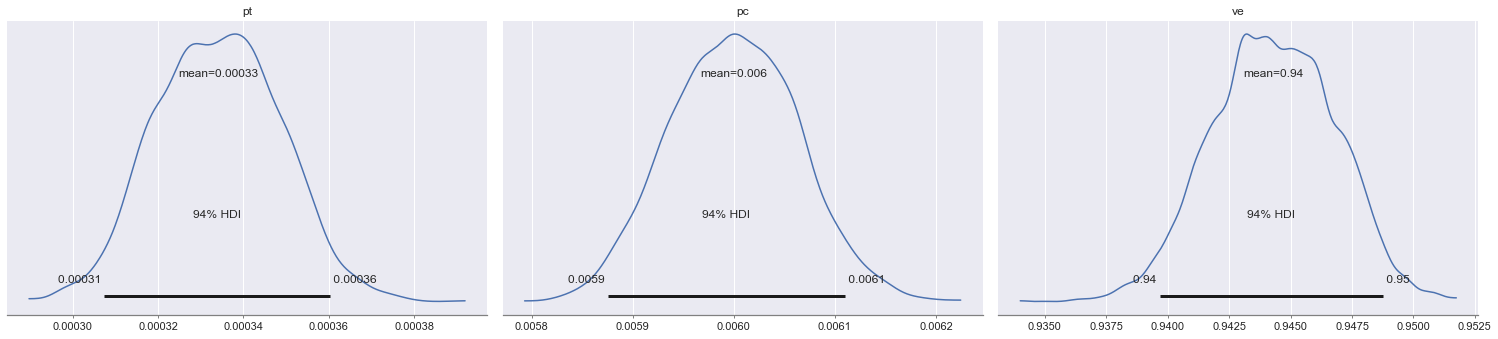

In [46]:
with model:
    az.plot_posterior(trace)